In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr
import datetime
from dateutil.relativedelta import relativedelta

from src.utils import modif_plot

# Extract Landy SIT

In [3]:
#odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/Landy_2022/'
odir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/Landy_2022/'
# ofile = f'ubristol_cryosat2_seaicethickness_nh_80km_v1p7.nc'
ofile = 'ubristol_cryosat2_seaicethickness_nh_80km_v1p7_reproj_TOPAZ4b_TARDIS_new.nc'

In [4]:
nc = xr.open_mfdataset(f'{odir}{ofile}', decode_times=False) # , combine='nested', concat_dim='time')

In [5]:
nc

<xarray.Dataset>
Dimensions:                        (x: 450, y: 479, time: 236)
Coordinates:
  * x                              (x) float64 1.394e+06 1.408e+06 ... 7.651e+06
  * y                              (y) float64 8.752e+06 8.738e+06 ... 2.09e+06
  * time                           (time) int64 0 15 30 45 ... 3545 3560 3576
Data variables:
    Sea_Ice_Thickness              (time, y, x) float64 dask.array<chunksize=(236, 479, 450), meta=np.ndarray>
    Sea_Ice_Thickness_Uncertainty  (time, y, x) float64 dask.array<chunksize=(236, 479, 450), meta=np.ndarray>
    Sea_Ice_Concentration          (time, y, x) float64 dask.array<chunksize=(236, 479, 450), meta=np.ndarray>
Attributes:
    name:         Landy22
    description:  Landy product projected on TOPAZ4b grid
    units:        m

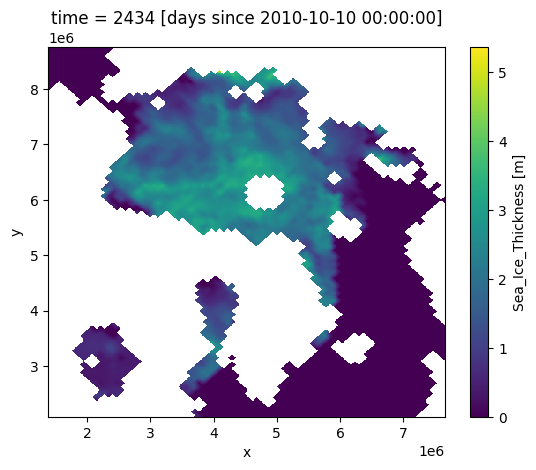

In [7]:
nc['Sea_Ice_Thickness'].isel(time=160).plot()

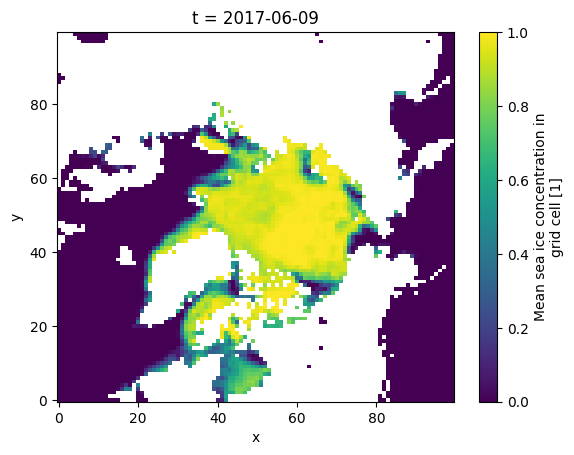

In [26]:
nc['Sea_Ice_Concentration'].isel(t=160).plot()

## get datetime right

In [10]:
d1 = datetime.datetime(1,1,1)

In [11]:
units1 = f'days since 0001-01-01'  # + 1 year than the dataset

In [13]:
ndays = nc['time'].to_numpy()  # Time

In [16]:
ndays

array([   0,   15,   30,   45,   61,   76,   92,  107,  122,  136,  150,
        165,  180,  195,  211,  226,  241,  256,  271,  287,  302,  318,
        333,  348,  364,  379,  394,  409,  425,  440,  456,  471,  486,
        500,  517,  532,  547,  562,  578,  593,  608,  623,  638,  654,
        669,  685,  700,  715,  731,  746,  761,  776,  792,  807,  823,
        838,  853,  867,  882,  897,  912,  927,  943,  958,  973,  988,
       1003, 1019, 1034, 1050, 1065, 1080, 1096, 1111, 1126, 1141, 1157,
       1172, 1188, 1203, 1218, 1232, 1247, 1262, 1277, 1292, 1308, 1323,
       1338, 1353, 1368, 1384, 1399, 1415, 1430, 1445, 1461, 1476, 1491,
       1506, 1522, 1537, 1553, 1568, 1583, 1597, 1611, 1626, 1641, 1656,
       1672, 1687, 1702, 1717, 1732, 1748, 1763, 1779, 1794, 1809, 1825,
       1840, 1855, 1870, 1886, 1901, 1917, 1932, 1947, 1961, 1978, 1993,
       2008, 2023, 2039, 2054, 2069, 2084, 2099, 2115, 2130, 2146, 2161,
       2176, 2192, 2207, 2222, 2237, 2253, 2268, 22

In [19]:
nc['time']

<xarray.DataArray 'time' (time: 236)>
array([   0,   15,   30, ..., 3545, 3560, 3576])
Coordinates:
  * time     (time) int64 0 15 30 45 61 76 92 ... 3500 3515 3530 3545 3560 3576
Attributes:
    units:     days since 2010-10-10 00:00:00
    calendar:  proleptic_gregorian

In [20]:
# we substract the additional year
all_days = np.array([datetime.datetime(2010,10,10) + datetime.timedelta(days=int(x)) for x in ndays])

In [17]:
# we substract the additional year
all_days = np.array([d1 + datetime.timedelta(days=x) - relativedelta(years=1) for x in ndays])

ValueError: year 0 is out of range

In [23]:
da = xr.DataArray(
    data=all_days,
    dims=["t"],
    attrs=dict(
        standard_name='time',
        description="Datetime"
    ),
)


In [24]:
nc = nc.assign_coords(t=da)

---

## Extract variables

In [25]:
sit = nc['Sea_Ice_Thickness']

In [26]:
situ = nc['Sea_Ice_Thickness_Uncertainty']

In [27]:
cc = nc['Sea_Ice_Concentration']

In [28]:
sitm = sit.mean(dim=('y','x'))
sitm_c15 = sit.where(cc>.15).mean(dim=('y','x'))
sitm_c0 = sit.where(cc>0.0).mean(dim=('y','x'))

In [29]:
situm = situ.mean(dim=('y','x'))
situm_c15 = situ.where(cc>.15).mean(dim=('y','x'))
situm_c0 = situ.where(cc>0.0).mean(dim=('y','x'))

In [30]:
# compute volume

vol_15 = (sit.where(cc>.15) * cc).mean(dim=('y','x'))

## Plot

In [31]:
savefig = False

KeyboardInterrupt: 

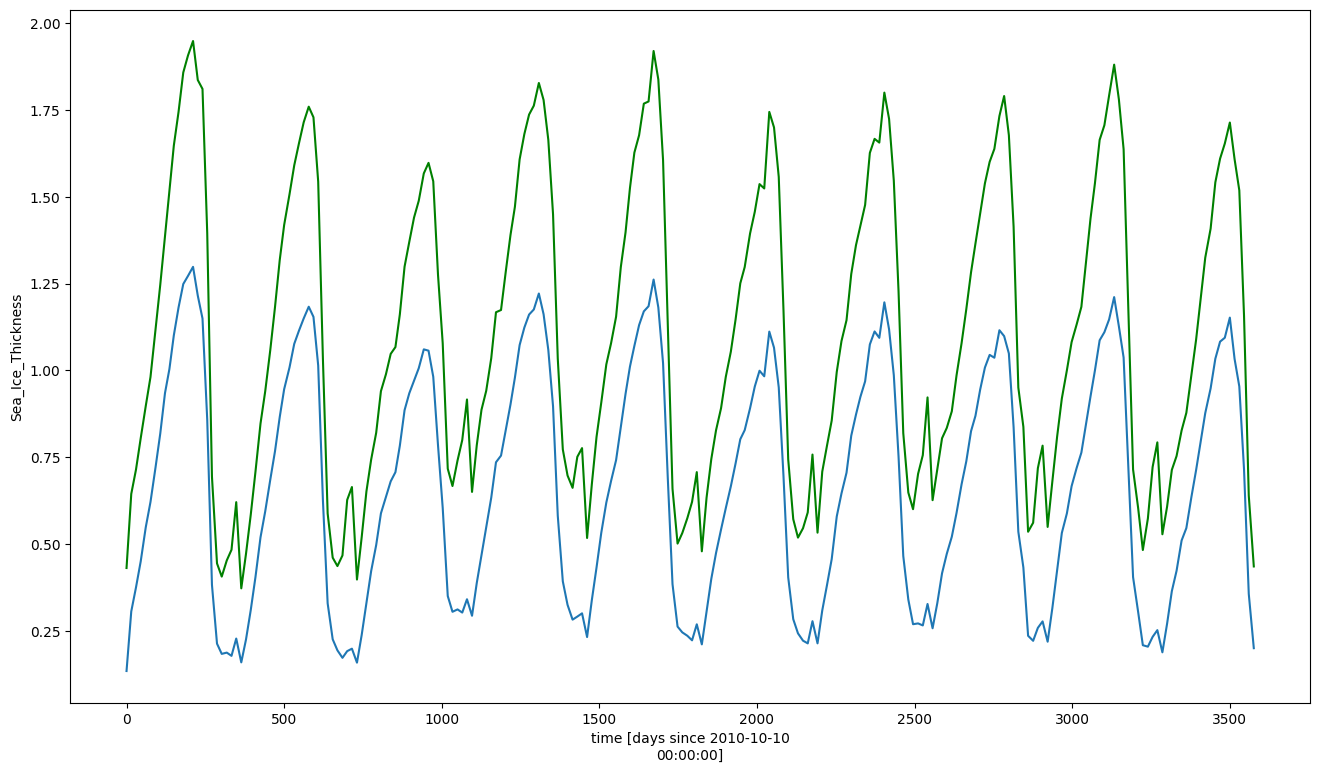

In [32]:
fig, ax = plt.subplots(figsize=(16,9))

sitm.plot(ls='-', label='all gridpoints')
# (sitm+situm).plot(c='grey', alpha=0.5, ls='--')
# (sitm-situm).plot(c='grey', alpha=0.5, ls='--')

sitm_c0.plot(c='green', label='SIC > 0')

sitm_c15.plot(c='r', label='SIC > 15%')
(sitm_c15+situm_c15).plot(c='darkred', alpha=0.2, label='SIC > 15% uncert.')
(sitm_c15-situm_c15).plot(c='darkred', alpha=0.2)



plt.legend()
plt.ylabel('SIT (m)')
plt.xlabel('')
plt.title('Landy 2022 - average over the Arctic')


modif_plot.resize(fig, 18, rx=15)

if savefig:
    odir = '/nird/projects/nird/NS2993K/Leo/SIT_observations/Landy_2022/results/'
    filename = f'Landy22_SIT.png'
    plt.savefig(f"{odir}{filename}")
    print(f'Figure saved as: {odir}{filename}')

----

### Create datasets with SIT and SIT uncertainty average

In [21]:
sitm_c15.data

dask.array<mean_agg-aggregate, shape=(236,), dtype=float64, chunksize=(236,), chunktype=numpy.ndarray>

In [24]:
nc['Sea_Ice_Concentration'][:].data

dask.array<open_dataset-09992e959c214c81a962c96ffeba71faSea_Ice_Concentration, shape=(236, 100, 100), dtype=float64, chunksize=(236, 100, 100), chunktype=numpy.ndarray>

In [33]:
data_vars = {'Sea_Ice_Thickness':(['t'], sitm_c15.data, 
                                 {'units':'m',
                                 'description':'only for sea ice concentration > 15%'}),
           'Sea_Ice_Thickness_Uncertainty': (['t'], situm_c15.data, 
                                 {'units':'m',
                                 'description':'only for sea ice concentration > 15%'}),
             'Sea_Ice_Volume':(['t'], vol_15.data,
                                 {'units':'m3',
                                 'description':'sea ice thickness (sic>15%) x sea ice concentration'})
            }

coords = {'t': (['t'], da.data)}


In [34]:
ds15 = xr.Dataset(data_vars=data_vars, coords=coords, attrs={})

In [35]:
data_vars = {'Sea_Ice_Thickness':(['t'], sitm_c0.data, 
                                 {'units':'m',
                                 'description':'only for sea ice concentration > 0%'}),
           'Sea_Ice_Thickness_Uncertainty': (['t'], situm_c0.data, 
                                 {'units':'m',
                                 'description':'only for sea ice concentration > 0%'})}

coords = {'t': (['t'], da.data)}


In [36]:
ds0 = xr.Dataset(data_vars=data_vars, coords=coords, attrs={})

In [37]:
ds15

<xarray.Dataset>
Dimensions:                        (t: 236)
Coordinates:
  * t                              (t) datetime64[ns] 2010-10-10 ... 2020-07-25
Data variables:
    Sea_Ice_Thickness              (t) float64 dask.array<chunksize=(236,), meta=np.ndarray>
    Sea_Ice_Thickness_Uncertainty  (t) float64 dask.array<chunksize=(236,), meta=np.ndarray>
    Sea_Ice_Volume                 (t) float64 dask.array<chunksize=(236,), meta=np.ndarray>

----

## Save .nc

In [38]:
start_date = all_days[0].strftime('%Y%m%d')
end_date = all_days[-1].strftime('%Y%m%d')
str_date = f'{start_date}_{end_date}'

In [39]:
odir = '/scratch/project_465000269/edelleo1/Leo/SIT_observations/Landy_2022/results/'
#ofile = f'Landy22_SIT_mean_SIC0_{str_date}.nc'
#ds0.to_netcdf(f'{odir}{ofile}')

ofile = f'Landy22_SIT_mean_SIC15_{str_date}_reproj_TP4.nc'
ds15.to_netcdf(f'{odir}{ofile}')